In [57]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *

%matplotlib inline    
import matplotlib.pyplot as plt
import bisect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

In [59]:
filename = 'ob/6711/instability_data/06711_Inst_B1H_Q7_20180522_05h07m20s.h5'
alldat = ob_tbt(filename, fill_number)

File at:  2018-05-22 05:07:20  (CET)  2018-05-22 03:07:20+00:00  (UTC)   Status:  [u'STABLE']


# Filling scheme

In [60]:
cals.search('%FILL_PATTERN%')
raw_data =   importData.LHCCals2pd('LHC.BCTFR.A6R4.B1:BUNCH_FILL_PATTERN', fill_number, 'RAMP')
for i in raw_data['LHC.BCTFR.A6R4.B1:BUNCH_FILL_PATTERN'][0:1]:
    bunches = np.where(np.array(i)>0.1)[0]
    print bunches
print len(bunches)

[  37   38   39 ..., 3429 3430 3431]
2556


# frev

In [61]:
modes = ['STABLE']
time = {}
time['STABLE'] = (pd.Timestamp('2018-05-22 03:07:20+00:00'), pd.Timestamp('2018-05-22 03:07:22+00:00') )
df = get_data(modes, time)
frf = df.B1.H.tbt.STABLE['ALB.SR4.B1:FGC_FREQ'].iloc[0]
h = 35640
frev = frf/h
print frev

11245.5031686


# Average over all bunches

In [62]:
data = (np.mean(alldat[:, bunches[:]],axis=1))
print alldat[:].shape
print data.shape


(65536, 3564)
(65536,)


<IPython.core.display.Javascript object>


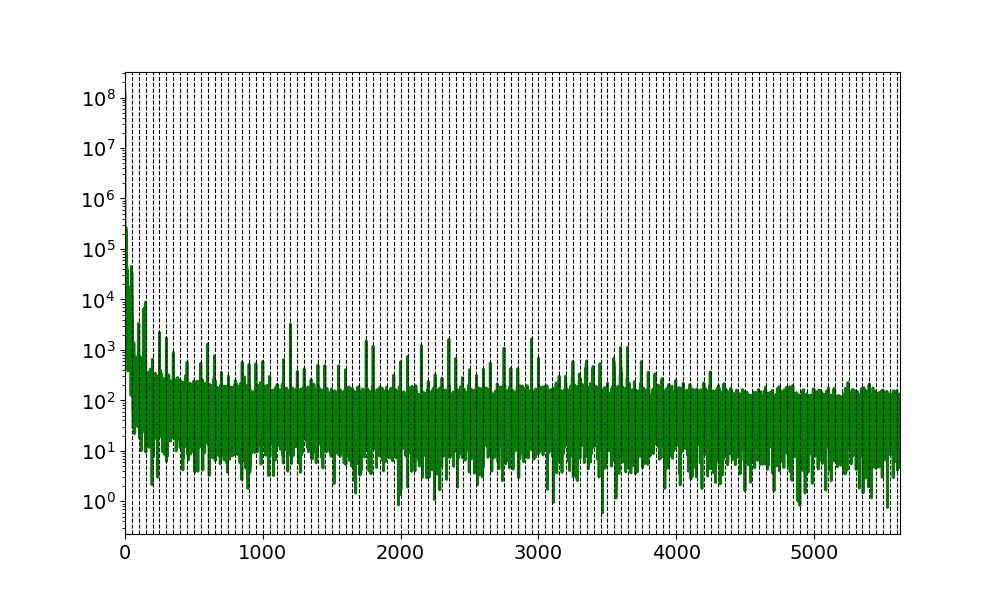

In [68]:
%matplotlib notebook
fourier = np.fft.rfft(data)
freqs = np.fft.rfftfreq(len(fourier)*2-1, 1.0/frev)
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.semilogy(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)


<IPython.core.display.Javascript object>


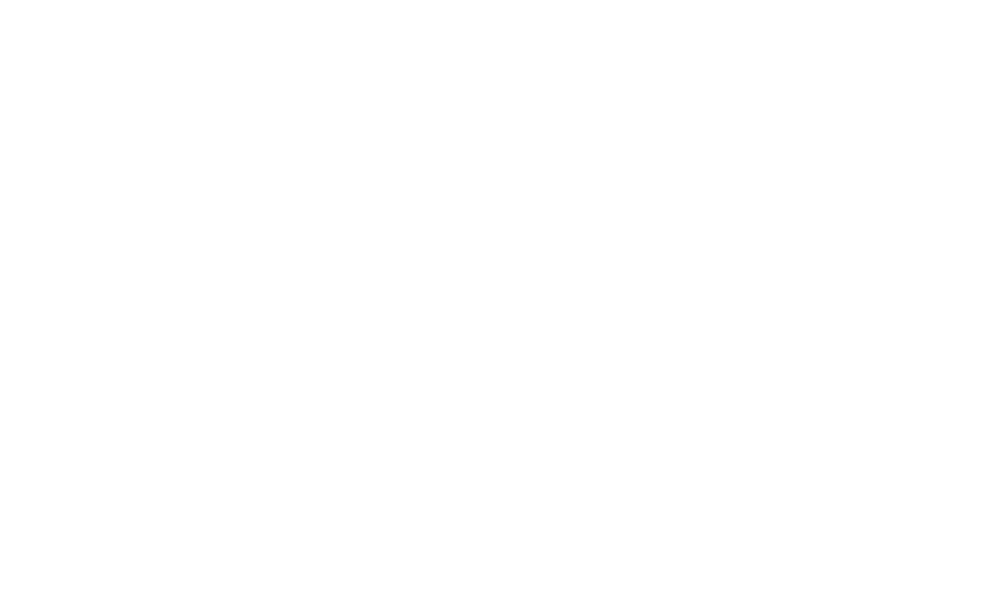

Text(0.5,0,u'f [Hz]')

In [63]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6))
xmin = 0.26*frev; xmax = 0.33*frev
lower_bound_i = bisect.bisect_left(freqs, xmin)
upper_bound_i = bisect.bisect_right(freqs, xmax, lo=lower_bound_i)
yy = abs(fourier)[lower_bound_i:upper_bound_i]
plt.plot(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)
plt.xlim(xmin, xmax)
plt.ylim([min(yy), max(yy)])
plt.ylabel('Amplitude average bunches')
plt.xlabel('f [Hz]')

<IPython.core.display.Javascript object>


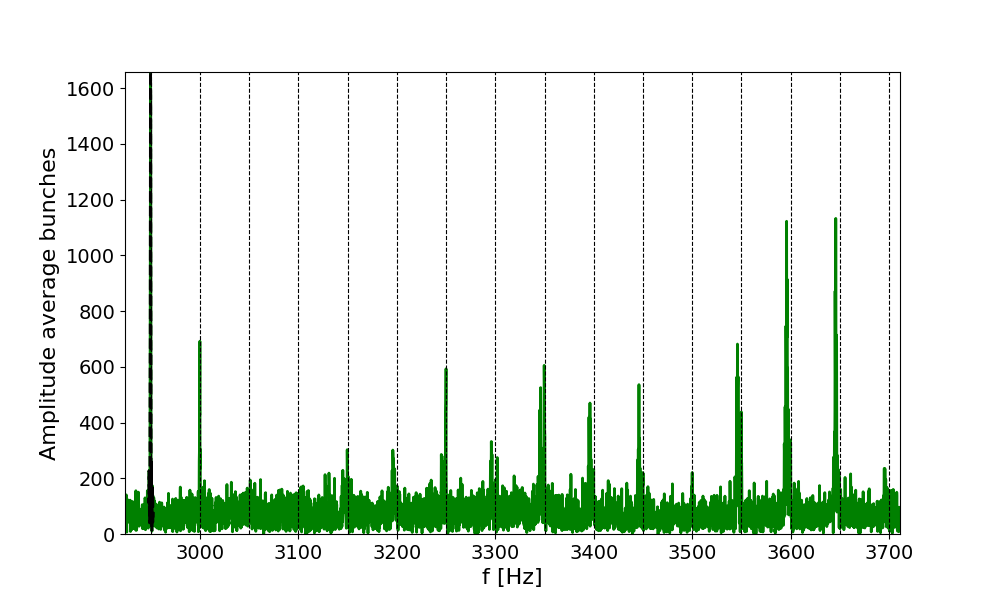

In [64]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6))
xmin = 0.26*frev; xmax = 0.33*frev
lower_bound_i = bisect.bisect_left(freqs, xmin)
upper_bound_i = bisect.bisect_right(freqs, xmax, lo=lower_bound_i)
yy = abs(fourier)[lower_bound_i:upper_bound_i]
plt.plot(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)
plt.xlim(xmin, xmax)
plt.ylim([min(yy), max(yy)])
plt.ylabel('Amplitude average bunches')
plt.xlabel('f [Hz]')

xmin = 2947.5; xmax = 2952.5
myFilter = (freqs>=xmin)&(freqs<=2952.5)
plt.plot(freqs[myFilter],abs(fourier)[myFilter], c='k', linestyle='--')
plt.show()

In [65]:
x = np.sum(abs(fourier)[myFilter])/len(abs(fourier))
print '%s um' %x

0.302711310938 um


<IPython.core.display.Javascript object>


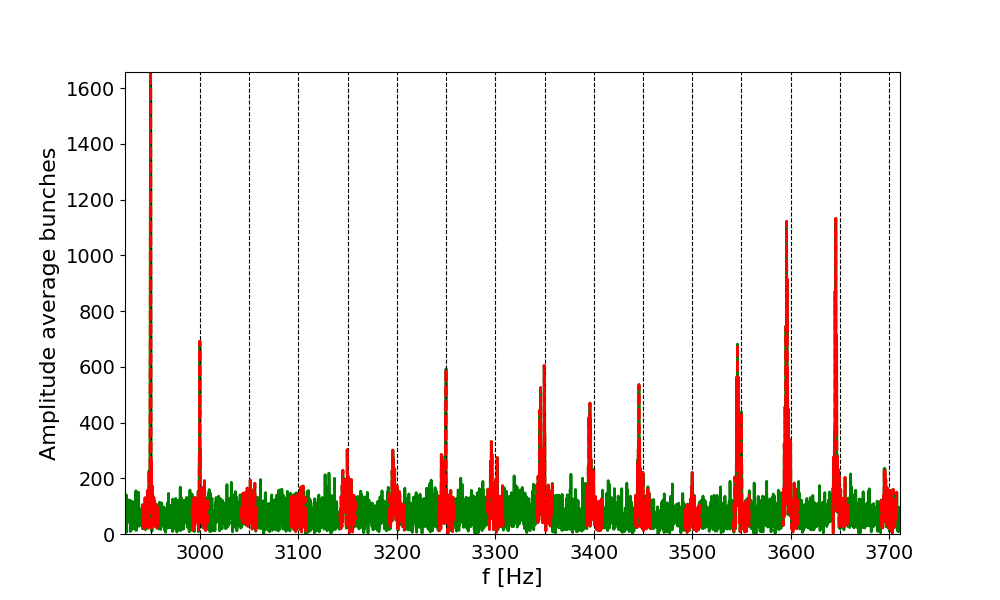

42.0-58.0 Hz, 13.689441543 um
92.0-108.0 Hz, 0.79580104175 um
142.0-158.0 Hz, 1.48532854418 um
192.0-208.0 Hz, 0.458332728566 um
242.0-258.0 Hz, 0.427800112135 um
292.0-308.0 Hz, 0.392919458944 um
342.0-358.0 Hz, 0.345127381718 um
392.0-408.0 Hz, 0.260802190389 um
442.0-458.0 Hz, 0.302278250314 um
492.0-508.0 Hz, 0.255162842405 um
542.0-558.0 Hz, 0.28622940823 um
592.0-608.0 Hz, 0.38657351764 um
642.0-658.0 Hz, 0.290377837587 um
692.0-708.0 Hz, 0.249866245228 um
742.0-758.0 Hz, 0.255653615507 um
792.0-808.0 Hz, 0.231441902735 um
842.0-858.0 Hz, 0.244617950468 um
892.0-908.0 Hz, 0.255967133935 um
942.0-958.0 Hz, 0.24343750435 um
992.0-1008.0 Hz, 0.274772313491 um
1042.0-1058.0 Hz, 0.208585438801 um
1092.0-1108.0 Hz, 0.216480812903 um
1142.0-1158.0 Hz, 0.27084471954 um
1192.0-1208.0 Hz, 0.374336928899 um
1242.0-1258.0 Hz, 0.223546203453 um
1292.0-1308.0 Hz, 0.234537580645 um
1342.0-1358.0 Hz, 0.211654926497 um
1392.0-1408.0 Hz, 0.238146346784 um
1442.0-1458.0 Hz, 0.231150636297 um
1492.0

In [66]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6))
xmin = 0.26*frev; xmax = 0.33*frev
lower_bound_i = bisect.bisect_left(freqs, xmin)
upper_bound_i = bisect.bisect_right(freqs, xmax, lo=lower_bound_i)
yy = abs(fourier)[lower_bound_i:upper_bound_i]
plt.plot(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)
plt.xlim(xmin, xmax)
plt.ylim([min(yy), max(yy)])
plt.ylabel('Amplitude average bunches')
plt.xlabel('f [Hz]')

x_tot = []
f_tot = []
lims = []
for i in range(1,113):
    lims.append((i*50-8., i*50+8.))

for lim in lims:
  xmin = lim[0]; xmax = lim[1]
  myFilter = (freqs>=xmin)&(freqs<=xmax)
  plt.plot(freqs[myFilter],abs(fourier)[myFilter], c='r', linestyle='--')
  x = np.sum(abs(fourier)[myFilter])/len(abs(fourier))
  print '%s-%s Hz, %s um' %(xmin, xmax, x)
  x_tot.append(x)
  f_tot.append(xmin)  
plt.show()

# Dispersion

In [67]:
aux_col=importData.tfs2pd(['2018/collisionAt30cm_150urad/lhcb1_thick.twiss', '2018/collisionAt30cm_150urad/lhcb2_thick.twiss'])
OB = ['BPMCS.7L4.B1', 'BPMCS.7R4.B1', 'BPMCS.7R4.B2', 'BPMCS.7L4.B2']
madx = aux_col.iloc[0]['TABLE']
madx_col=dotdict
madx_col.B1=madx
madx = aux_col.iloc[1]['TABLE']
madx_col.B2=madx

# B1H
tw = madx_col.B1[madx_col.B1.NAME == OB[0]][['S', 'BETX', 'BETY', 'DX']]
print x_tot/tw['DX'].values[0]

[ 101.69917899    5.91202441   11.03454023    3.40496448    3.17813696
    2.91900778    2.56395933    1.93750553    2.24563214    1.89561068
    2.12640492    2.87186364    2.1572237     1.85626214    1.89925664
    1.71938727    1.81727243    1.90158578    1.80850287    2.0412899
    1.54958607    1.60824098    2.01211171    2.78095773    1.66072993
    1.74238513    1.57238936    1.76919474    1.71722344    1.37154888
    1.835175      1.63692274    1.41603397    1.46868124    2.15215354
    2.49604805    1.5429646     1.26668738    1.50792056    1.55901859
    1.72879629    1.39104907    1.95049907    1.36683618    1.4492825
    1.46776577    3.27818248    1.71910469    1.40864345    1.72869974
    1.62211877    1.51812527    1.90651688    1.28211725    2.72894613
    1.72078987    1.85168043    1.45001133    3.2075925     2.07284497
    1.56610624    1.64655696    1.86787547    2.09712808    2.42314748
    2.20361593    3.15954537    2.49452858    2.37766635    1.35126639
    3.15

In [7]:
%matplotlib notebook
x = alldat[:, bunches[:]].flatten()

In [8]:
n=2**25
fourier_all = np.fft.rfft(x[0:n])
freqs_all = np.linspace(0, frev*len(bunches)/2.0, n//2 +1 )


<IPython.core.display.Javascript object>


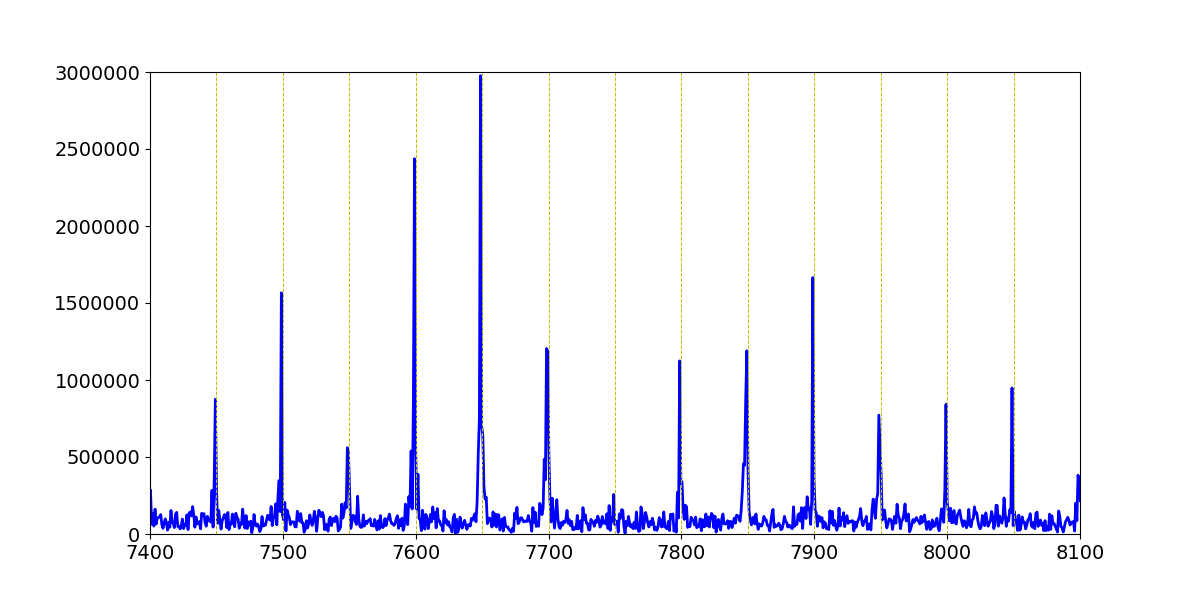

11245.5031686


<IPython.core.display.Javascript object>


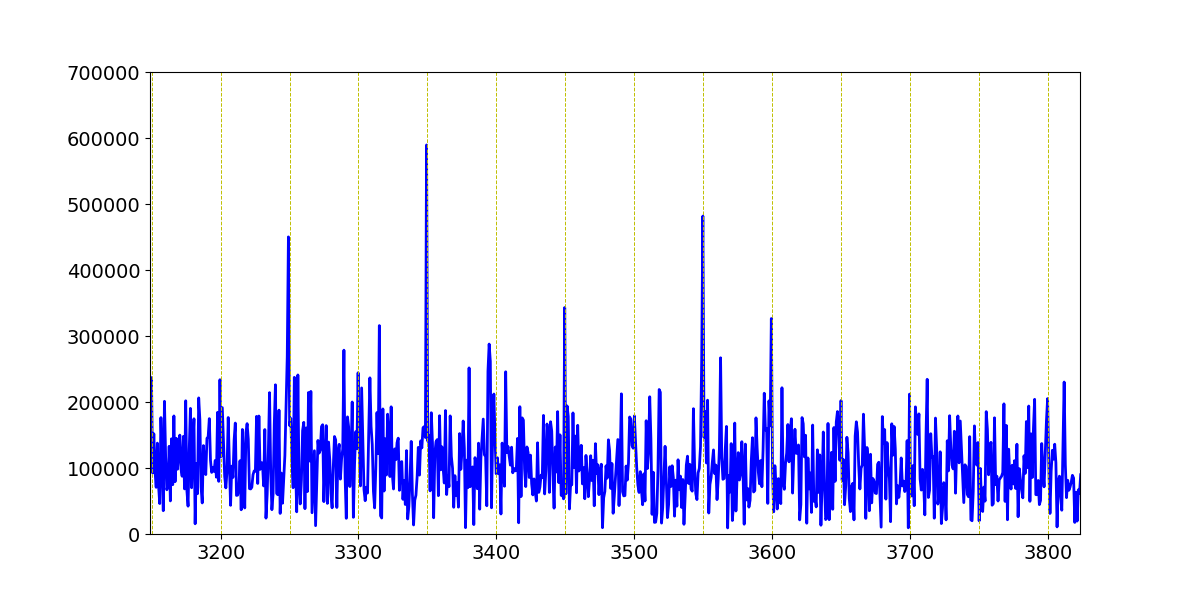

11245.5031686


In [46]:
fig1, ax1 = plt.subplots(figsize=(12,6))
print frev
plt.plot(freqs_all, abs(fourier_all), c='b')

for i in range(500):
    plt.axvline(frev*i, c='k', linestyle='--',linewidth=0.7)
for i in range(4000):
    plt.axvline(50.*i, c='y', linestyle='--',linewidth=0.7)
 
#plt.xlim([frev/2.,200500])
plt.xlim([7400.,8100])
plt.ylim([0,3e6])
plt.show()

fig1, ax1 = plt.subplots(figsize=(12,6))
print frev
plt.plot(freqs_all, abs(fourier_all),c='b')

for i in range(500):
    plt.axvline(frev*i, c='k', linestyle='--',linewidth=0.7)
for i in range(4000):
    plt.axvline(50.*i, c='y', linestyle='--',linewidth=0.7)
 
#plt.xlim([frev/2.,200500])
plt.xlim([0.28*frev,0.34*frev])
plt.ylim([0,7e5])
plt.show()

In [48]:
plt.close('all')

f_sampling=frev
f_harmonics = np.arange(7400, 8100,50)
data = (np.mean(alldat[:, bunches[:]],axis=1))
print alldat[:].shape
print data.shape

ali = []
ali2 = []
for f_harmonic in f_harmonics:
  ali2.append(f_harmonic)
  a = (f_harmonic%f_sampling)/f_sampling 
  if a>=0.5:
    a = 1.-a
  ali.append(a)



(65536, 3564)
(65536,)


<IPython.core.display.Javascript object>


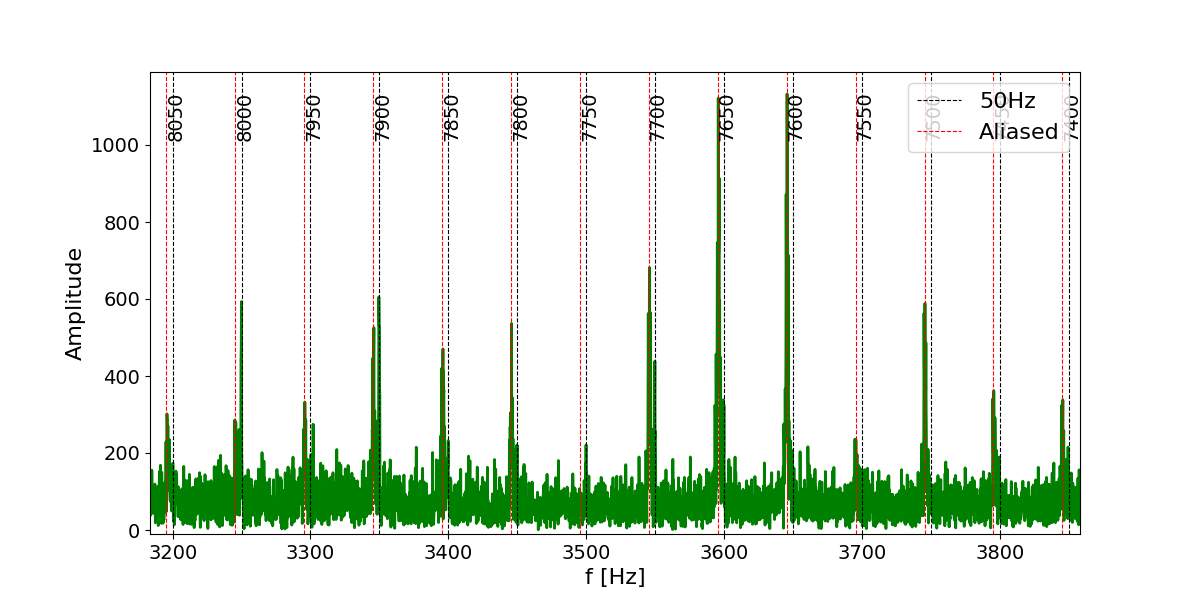

In [49]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(12,6))
fourier = np.fft.rfft(data)
freqs = np.fft.rfftfreq(len(fourier)*2-1, 1.0/frev)
plt.plot(freqs, abs(fourier), c='g')
for i in range(200):
    if i==0:
      plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8, label='50Hz')
    else:
        plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)
counter = 0
for a in ali:
    plt.text(a*frev,1100,'%s' %str(ali2[counter]),rotation=90, fontsize=14)
    if a==ali[0]:
      plt.axvline(a*frev, c='r', linestyle='--', linewidth=0.8, label='Aliased')
      
    else:
        plt.axvline(a*frev, c='r', linestyle='--', linewidth=0.8)
    counter+=1
plt.xlim([0.28*frev,0.34*frev])
plt.ylim([0,1200])
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.legend(loc=1)


In [51]:
print ali2
print [(f_harmonic%f_sampling)/f_sampling for f_harmonic in ali2]

[7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050]
[0.65804080876274273, 0.66248703044357204, 0.66693325212440147, 0.67137947380523078, 0.67582569548606009, 0.68027191716688951, 0.68471813884771882, 0.68916436052854813, 0.69361058220937744, 0.69805680389020686, 0.70250302557103617, 0.70694924725186548, 0.7113954689326949, 0.71584169061352421]


In [53]:
print [i*frev for i in ali]

[3845.5031685855174, 3795.5031685855179, 3745.503168585517, 3695.5031685855174, 3645.5031685855179, 3595.503168585517, 3545.5031685855174, 3495.5031685855174, 3445.5031685855179, 3395.503168585517, 3345.5031685855174, 3295.5031685855179, 3245.503168585517, 3195.5031685855174]


In [54]:
print frev

11245.5031686


In [137]:

cals.search('RPTE.U%A%:I_MEAS')



[u'MB.A8R1:D_PARAM_RB',
 u'MB.A8R1:I_HDS_1',
 u'MB.A8R1:I_HDS_2',
 u'MB.A8R1:I_HDS_3',
 u'MB.A8R1:I_HDS_4',
 u'MB.A8R1:L_COMP_RB',
 u'MB.A8R1:ST_MAGNET_OK',
 u'MB.A8R1:ST_MAGNET_OK_SQRB',
 u'MB.A8R1:ST_NQD0',
 u'MB.A8R1:ST_PWR_PERM',
 u'MB.A8R1:ST_PWR_PERM_RB',
 u'MB.A8R1:ST_PWR_PERM_SQRB',
 u'MB.A8R1:TS_MAGNET_NOK',
 u'MB.A8R1:U_1',
 u'MB.A8R1:U_2',
 u'MB.A8R1:U_DIODE_RB',
 u'MB.A8R1:U_EARTH_RB',
 u'MB.A8R1:U_HDS_1',
 u'MB.A8R1:U_HDS_2',
 u'MB.A8R1:U_HDS_3',
 u'MB.A8R1:U_HDS_4',
 u'MB.A8R1:U_QS0']

In [68]:
tw = madx_col.B1[madx_col.B1.NAME=='MB.A12R1.B1'][['NAME','S', 'BETX', 'BETY', 'DX']]

In [69]:
print tw

                   NAME           S        BETX       BETY        DX
455.264905  MB.A12R1.B1  455.264905  146.021347  45.648756  1.863236


In [71]:
print madx_col.B1[madx_col.B1.NAME=='BPMSW.1L1'][['NAME','S', 'BETX', 'BETY', 'DX']]

Empty DataFrame
Columns: [NAME, S, BETX, BETY, DX]
Index: []


In [74]:
cals.search('%BPMSW%')

[u'BLMEL.01L1.B1I10_BPMSW.1L1:DOSE_INT_HH',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_FAST',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS01',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS02',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS03',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS04',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS05',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS06',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS07',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS08',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS09',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS10',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS11',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:LOSS_RS12',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS01',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS02',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS03',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS04',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS05',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS06',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS07',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS08',
 u'BLMEL.01L1.B1I10_BPMSW.1L1:THRESH_RS09',
 u'BLMEL.01L1.